In [18]:
import pandas as pd
import numpy as np
import os
# Load data (adjust filename accordingly)
#df = pd.read_csv(r'C:\data\smokers.csv')

# Folder where your CSV files are located
folder_path = r'C:\data'

# Get list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Load and concatenate them
df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)



# Preview
df.head()
df.info()
df.isnull().sum()
df.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 30 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         3959 non-null   object 
 1   ICD10 Code                                                   3828 non-null   object 
 2   ICD10 Diagnosis                                              3828 non-null   object 
 3   Diagnosis Type                                               3828 non-null   object 
 4   Metric                                                       3828 non-null   object 
 5   Sex                                                          2608 non-null   object 
 6   Value                                                        3827 non-null   object 
 7   Tobacco Price
Index                                          36 non-null     f

C:\Users\PDineshReddy\AppData\Local\Temp\ipykernel_58352\2273975917.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
df.fillna(method='ffill', inplace=True)


C:\Users\PDineshReddy\AppData\Local\Temp\ipykernel_58352\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
df.fillna(method='ffill', inplace=True)


C:\Users\PDineshReddy\AppData\Local\Temp\ipykernel_58352\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
df.ffill(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()

df.hist(bins=30, figsize=(20, 15))
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [20]:
df.fillna(method='ffill', inplace=True)

C:\Users\PDineshReddy\AppData\Local\Temp\ipykernel_58352\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


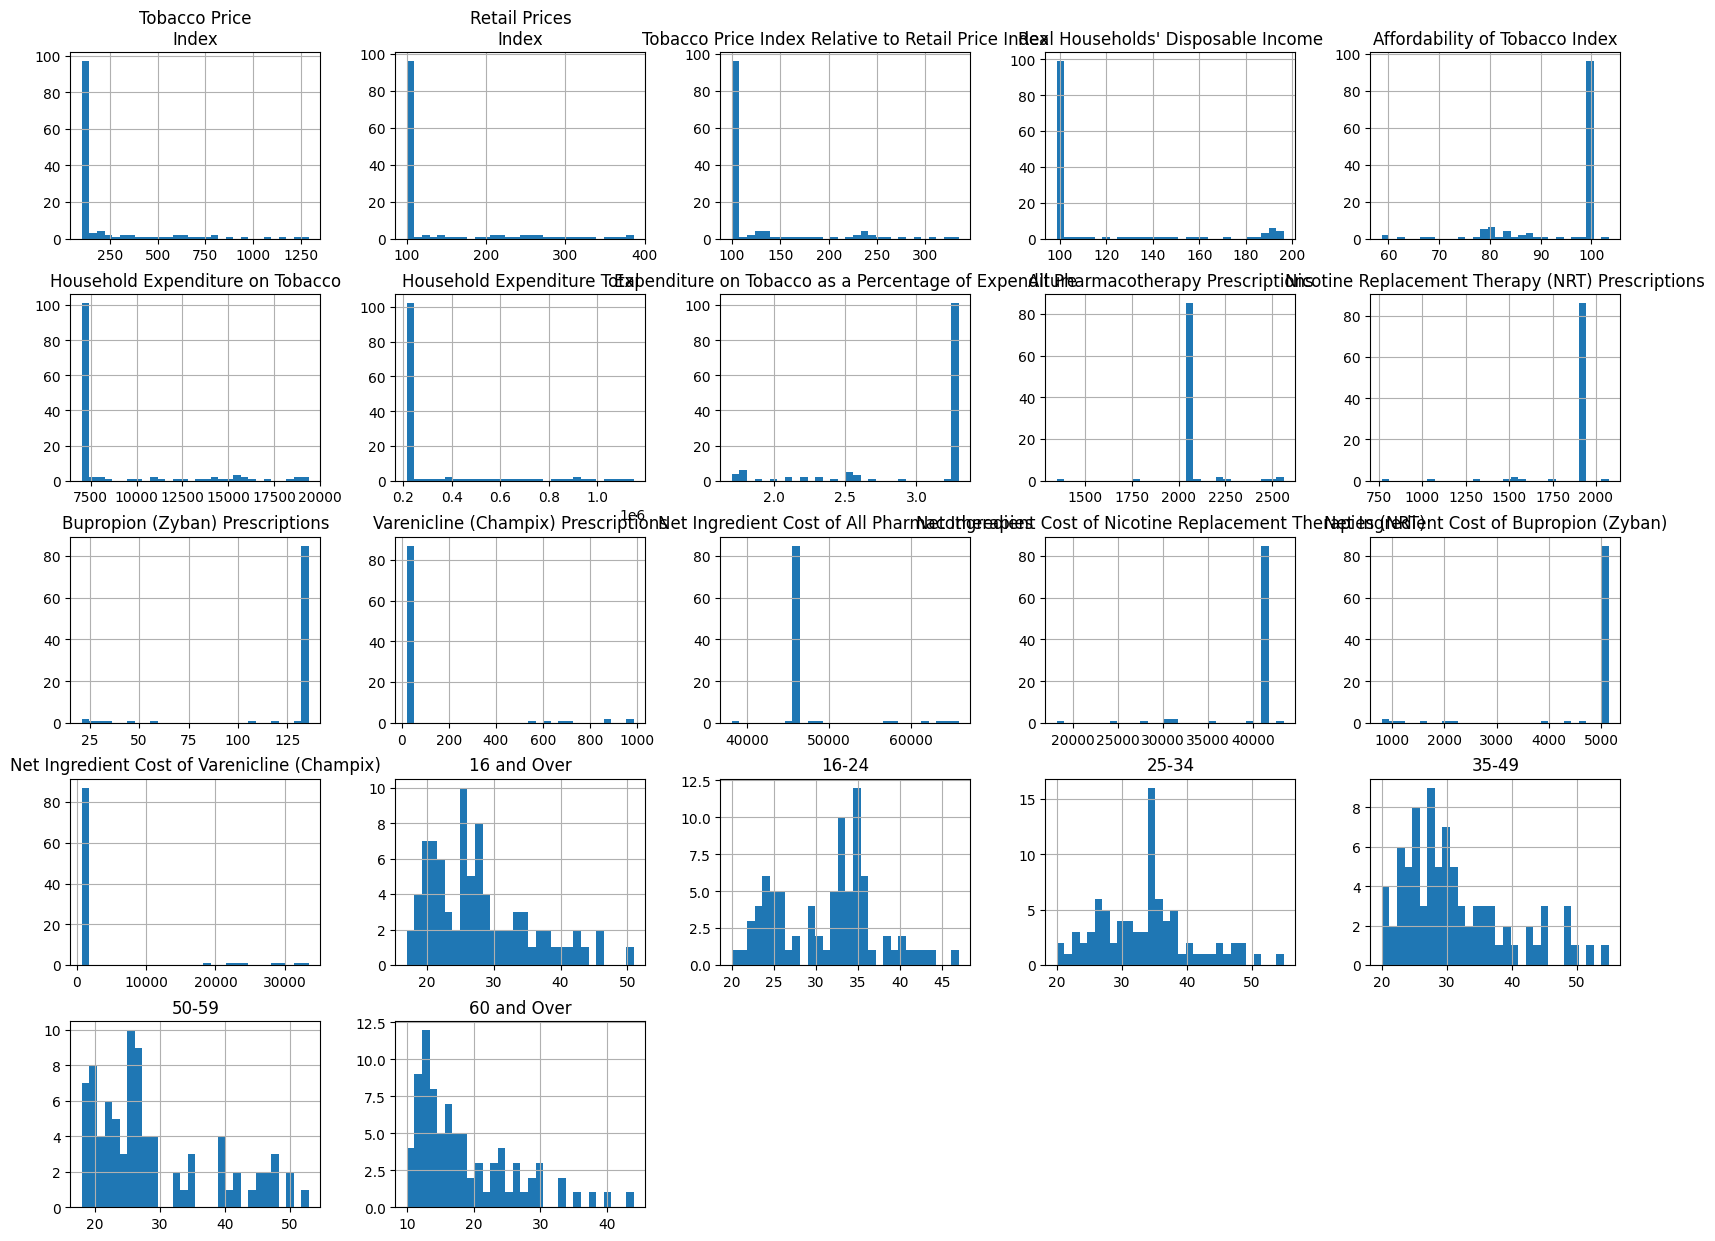

ValueError: could not convert string to float: '2014/15'

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()

df.hist(bins=30, figsize=(20, 15))
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic stats
print(df.describe())

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Optional: histograms
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


       Tobacco Price\nIndex  Retail Prices\nIndex  \
count            131.000000            131.000000   
mean             215.624427            138.331298   
std              256.981442             75.952634   
min              100.000000            100.000000   
25%              100.000000            100.000000   
50%              100.000000            100.000000   
75%              147.250000            124.300000   
max             1294.300000            386.700000   

       Tobacco Price Index Relative to Retail Price Index  \
count                                         131.000000    
mean                                          126.286260    
std                                            54.913675    
min                                           100.000000    
25%                                           100.000000    
50%                                           100.000000    
75%                                           118.450000    
max                               

ValueError: could not convert string to float: '2014/15'

<Figure size 1200x800 with 0 Axes>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('mortality', axis=1)   # Adjust if your label column is named differently
y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: "['mortality'] not found in axis"

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train
rf = RandomForestClassifier()
lr = LogisticRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

# Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)


NameError: name 'X_train' is not defined